<center><h2><u>LetsGrowMore Virtual Internship task -7 </u></h2></center>

<u>Mnist Handwritten Digit Classification</u>

Develop a system that recognition that capable of accurately classifying handwritten digits into the digits 0 through 9.

In [ ]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 39.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.1

In [ ]:
#changing to current working directory
import os

project_folder = "drive//MyDrive//hadwritten_digit_classification"
os.chdir(project_folder)

os.getcwd()

'/content/drive/MyDrive/hadwritten_digit_classification'

**<u>Importing Libraries</u>**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Activation
from keras.layers import LeakyReLU
from keras.layers import MaxPool2D,Dropout,BatchNormalization,MaxPooling2D

from tensorflow.keras import optimizers

from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.regularizers import l2,l1

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import numpy as np

**<u>Loading image dataset</u>**

In [ ]:
image_data = pd.read_csv('dataFiles//train.csv')
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
image_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


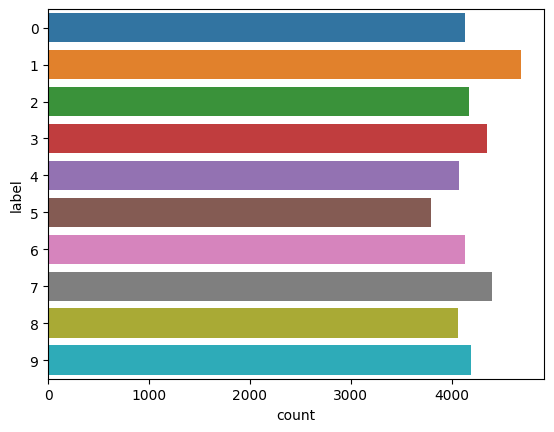

In [ ]:
sns.countplot(y='label', data=image_data)
plt.show()

**<u>Train and test split</u>**

In [ ]:
X = image_data.drop(labels = ["label"], axis = 1)
labels = image_data['label']

In [ ]:
# X will be reshaped so that it can fit into CNN
X = X.values.reshape(-1, 28, 28, 1)

In [ ]:
X = X/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, labels, test_size = 0.1, random_state = 2, stratify=labels)

**<u>CNN model architecture</u>**

In [ ]:
def Model_architecture(optimiser='adam',
                       dropout_rate=0.2,
                       batch_size=32):
    """
    This function helps to create a
    model architecture.
    Parameters
    ----------
      None
    Returns
    --------
      Model : object
    """
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, activation='relu',
                     input_shape=(28,28,1)))
    model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=3,padding='same'))

    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=3,padding='same'))

    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=optimiser,
				      loss='sparse_categorical_crossentropy',
				      metrics=['accuracy']
				     )

    return model

In [ ]:
model = Model_architecture()

history = model.fit(X_train, y_train,
						validation_data=(X_val, y_val),
						epochs=20,batch_size = 64)

Epoch 1/20
591/591 [==============================] - 16s 8ms/step - loss: 0.2018 - accuracy: 0.9344 - val_loss: 0.0536 - val_accuracy: 0.9826
Epoch 2/20
591/591 [==============================] - 5s 8ms/step - loss: 0.0529 - accuracy: 0.9839 - val_loss: 0.0438 - val_accuracy: 0.9876
Epoch 3/20
591/591 [==============================] - 5s 9ms/step - loss: 0.0352 - accuracy: 0.9888 - val_loss: 0.0409 - val_accuracy: 0.9879
Epoch 4/20
591/591 [==============================] - 5s 8ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0431 - val_accuracy: 0.9864
Epoch 5/20
591/591 [==============================] - 4s 7ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0399 - val_accuracy: 0.9883
Epoch 6/20
591/591 [==============================] - 5s 8ms/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0340 - val_accuracy: 0.9924
Epoch 7/20
591/591 [==============================] - 5s 9ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0313 - val_accuracy: 0.9914
Epoch

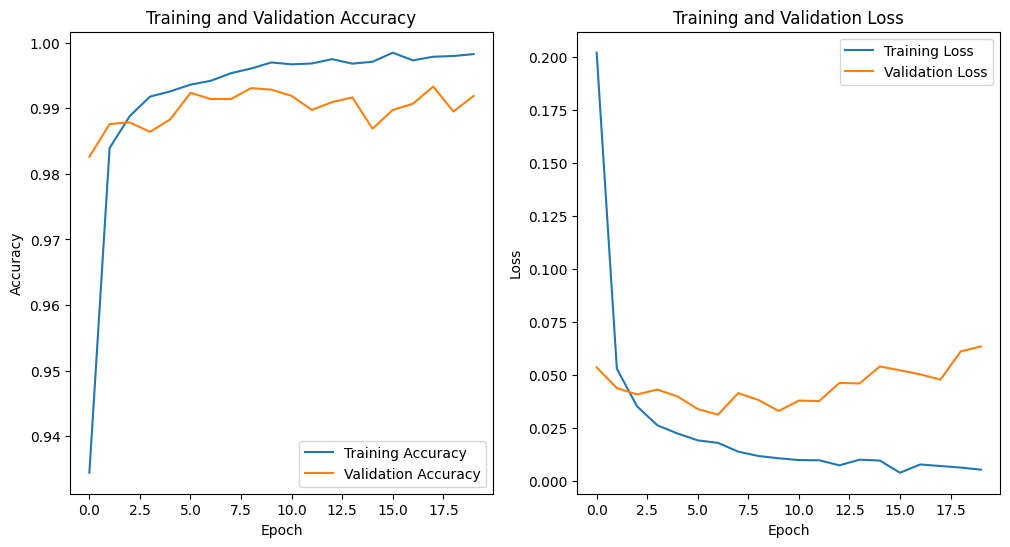

In [ ]:
def plot_accuracy_loss(history):
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_accuracy_loss(history)

In [ ]:
score = model.evaluate(X_val, y_val, verbose = 0)
print('Test loss: {}'.format(score[0] * 100))
print('Test score: {}'.format(score[1] * 100))

Test loss: 6.346183270215988
Test score: 99.19047355651855


132/132 [==============================] - 1s 4ms/step
[3 2 4 ... 9 6 1]


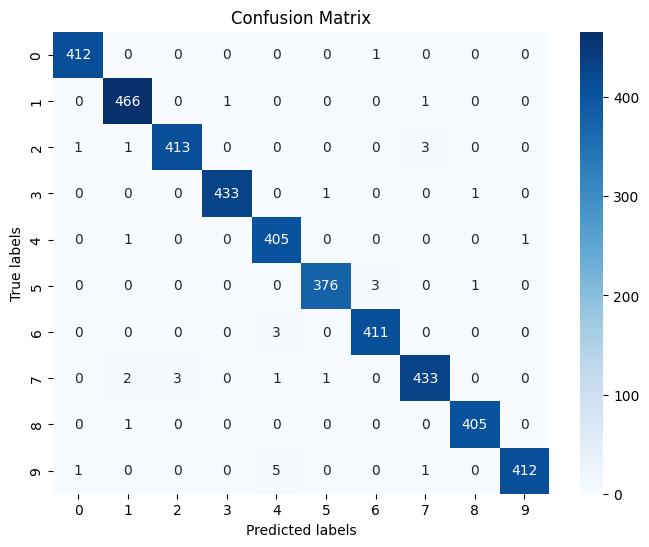

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)
#y_test_classes = np.argmax(valid_label, axis=1)
#print(y_test_classes)
# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**<u>Hyper parameter tuning</u>**

In [ ]:
%%time
# Create a KerasClassifier for use in scikit-learn
model = KerasClassifier(build_fn=Model_architecture, verbose=1)

# Define the hyperparameters to search over
param_dist = {
    'batch_size': [32, 64,96,128,256],
    'dropout_rate': [0.2, 0.3, 0.4],
    'optimiser': ['adam', 'sgd','rmsprop']
}

# Perform RandomizedSearchCV
n_iter_search = 20

random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(X_train, y_train,
						validation_data=(X_val, y_val))

print("Best parameters found: ", random_search.best_params_)


<timed exec>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


473/473 [==============================] - 6s 9ms/step - loss: 0.2652 - accuracy: 0.9144 - val_loss: 0.0719 - val_accuracy: 0.9757


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 329, in score
    outputs = self.model.evaluate(x, y, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_filexf9s78ku.py", line 15, in tf__test_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag_

315/315 [==============================] - 5s 10ms/step - loss: 0.3174 - accuracy: 0.8973 - val_loss: 0.1000 - val_accuracy: 0.9667


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


591/591 [==============================] - 8s 9ms/step - loss: 0.2245 - accuracy: 0.9286 - val_loss: 0.0613 - val_accuracy: 0.9805
Best parameters found:  {'optimiser': 'adam', 'dropout_rate': 0.3, 'batch_size': 64}
CPU times: user 10min 41s, sys: 34.9 s, total: 11min 16s
Wall time: 13min 40s


In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5,
                               restore_best_weights=True)
model_checkpoint = ModelCheckpoint('dataFiles//cnn_data_model.h5',
                                   monitor='val_loss', save_best_only=True)

model = Model_architecture(optimiser='adam',
                       dropout_rate=0.3,
                       batch_size=64)

model.fit(X_train, y_train,
						validation_data=(X_val, y_val),
          callbacks=[early_stopping, model_checkpoint],
          epochs=40,
          verbose=2)

Epoch 1/40
1182/1182 - 11s - loss: 0.1872 - accuracy: 0.9398 - val_loss: 0.0526 - val_accuracy: 0.9821 - 11s/epoch - 9ms/step
Epoch 2/40
1182/1182 - 6s - loss: 0.0542 - accuracy: 0.9835 - val_loss: 0.0371 - val_accuracy: 0.9888 - 6s/epoch - 5ms/step
Epoch 3/40
1182/1182 - 7s - loss: 0.0387 - accuracy: 0.9872 - val_loss: 0.0377 - val_accuracy: 0.9874 - 7s/epoch - 6ms/step
Epoch 4/40
1182/1182 - 6s - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.0458 - val_accuracy: 0.9886 - 6s/epoch - 5ms/step
Epoch 5/40
1182/1182 - 6s - loss: 0.0236 - accuracy: 0.9931 - val_loss: 0.0347 - val_accuracy: 0.9898 - 6s/epoch - 5ms/step
Epoch 6/40
1182/1182 - 7s - loss: 0.0220 - accuracy: 0.9928 - val_loss: 0.0394 - val_accuracy: 0.9917 - 7s/epoch - 6ms/step
Epoch 7/40
1182/1182 - 6s - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0511 - val_accuracy: 0.9890 - 6s/epoch - 5ms/step
Epoch 8/40
1182/1182 - 6s - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0319 - val_accuracy: 0.9921 - 6s/epoch - 5ms/step
Epoch 

132/132 [==============================] - 0s 2ms/step
[3 2 4 ... 9 6 1]


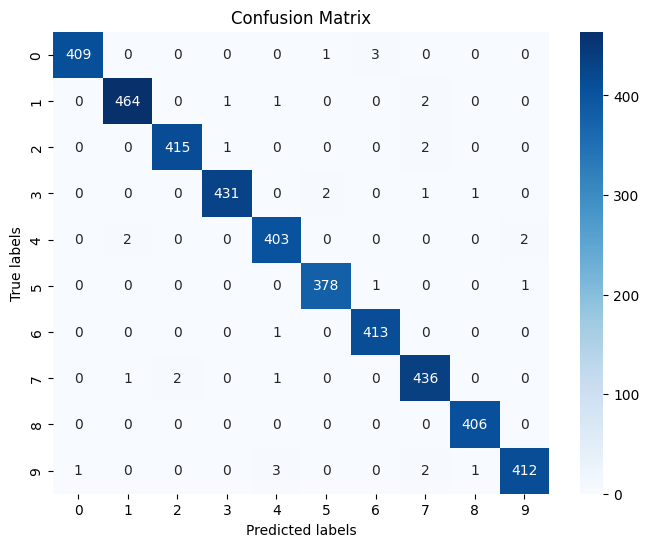

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)
#y_test_classes = np.argmax(valid_label, axis=1)
#print(y_test_classes)
# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()